# Udemy 【한글자막】머신러닝의 모든 것 with Python, R


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing Tools

> - 강의 21 - 누락된 데이터 처리하기
- 강의 22 - 범주형 데이터 인코딩
- 강의 23 - 데이터세트를 훈련 세트와 테스트 세트로 분할하기
- 강의 24 - 기능확장

## Importing the libraries
## 라이브러리 불러오기

In [ ]:
# 배열작업을 위한 라이브러리.
import numpy as np
# 차트와 그래프
import matplotlib.pyplot as plt

import pandas as pd

## Importing the dataset
## 데이터 세트 가져오기

>- 독립변수 : 예측할수있는 정보를 가진 변수
>- 종속변수 : 예측

In [ ]:
# 데이터 불러오기

dataset = pd.read_csv('/content/drive/MyDrive/UDEMY/Machine Learning A-Z (Codes and Datasets)/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv')
dataset

# iloc : locate indexes 
# iloc[행, 열]
dataset.iloc[:, :-1].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)
print('=========================================')
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data
## 결측치
> - 관측값을 지우고 무시. - 하나의 방법일 뿐 ( 1% 정도...)
- 누락된 데이터를 대체 - ex. 평균값을 결측치로 채움

In [ ]:
# 데이터 전처리 라이브러리.
# SimpleImputer 평균값으로 결측치 대체
from sklearn.impute import SimpleImputer

# 클래스의 인스턴스 생성 누락된 salary값을 평균 salary로
# 변수 = 객체생성(대체해야할 결측치를 지정=np.nan, 인자='평균')
# 행렬 내 모든 결측치를 자체의 평균값으로 대체하겠다.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# 객체.fit(X[행, 열(컬럼범위)]) : 문자열 제외
imputer.fit(X[:, 1:3])

# transform 누락된 salary를 평균값으로 대체
imputer.transform(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data
## 범주형 데이터 인코딩

### Encoding the Independent Variable

In [ ]:
# 문자열을 숫자열로 바꿔줘야함
# 예를 들어 프랑스 0, 스페인 1, 독일 2로 바꾸는 방법이 있음.
# 이럴 경우 머신러닝 모델이 국가 숫자들이 순서가 있다고 판단할수 있음.
# 세 국가는 관계가 없기때문에 상호관계에 영향을 주면 안됨.

# one-hot 인코딩을 사용함( 범주형 데이터 전처리 )
# one-hot 인코딩은 각 나라에 이진백터를 생성하는 것으로 구성.
# 프랑스 1 0 0 / 스페인 0 1 0 / 독일 0 0 1 / 세개의 열이 생김

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# ColumnTransformer('transformer='로 어떤 열의 인덱스에변환을 할것인지 , 'remainder='는 age, salary처럼 변환이 적용되지 않고 유지되길원하는 값)
# transformers=[('변환의 종류', 인코딩을 실행할 클래스의 이름, onehot인코딩 적용할 열의 인덱스[0=Country])]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

## 종속변수 인코딩
> - 0과 1로 
- LabelEncoder 이용

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

## 훈련세트와 테스트세트 분리

In [ ]:
# 데이터 세트를 훈련 , 테스트로 분리후 피처스케일링 
# 훈련데이터   : 기존 관측값으로 기계모델을 훈련
# 테스트데이터 : 새로운 관측값으로 모델의 성능을 평가.
# 새로운 관측값이 미래에 갖게되는 데이터이자 미래 머신러닝 모델에 배치할 데이터.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


## Feature Scaling

- 모든 특성을 동일한 크기로


In [ ]:
# 모든 변수나 특징을 스케일링하는 도구
# 모든값이 같은 단위가 되게끔 함.
# 특징은 다른 하나를 지배해서 머신러닝 모델에 의해 무시되는 일을 막기위함.

### Standardisation '표준화'
- 특성의 각 값에서 모든 특성값의 평균을 빼고 변수의 제곱근인 표준 편차로 나눠줌.
- 모든 특성의 값을 -3 ~ +3 사이.

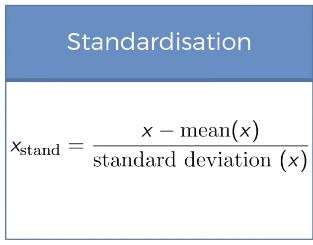

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/UDEMY/Machine Learning A-Z (Codes and Datasets)/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/111.JPG')

### Normalisation '정규화'
- 각 특성값에서 특성의 최소값을 빼고, 특성의 최대값과 최소값의 차로 나눠줌.
- 특성의 모든 값 0과 1사이.

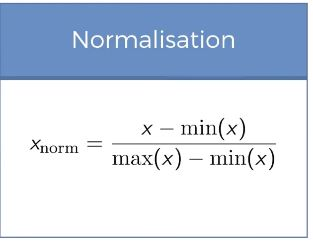

In [ ]:
Image('/content/drive/MyDrive/UDEMY/Machine Learning A-Z (Codes and Datasets)/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/222.JPG')

### 표준화 vs 정규화
- 정규화 : 대부분의 특성에 정규 분포(특정 상황)가 있을 때.
- 표준화 : 언제나 작동하는 기법

In [ ]:
# from sklern 클래스 불러오고
# .preprocessing 전처리 모듈 불러오고 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# age와 salary 값에 대한 열만 
# fit       : 각 특성의 평균과 표준 편차를 구함.
# transform : 이 공식을 적용해 모든 값이 같은 크기를 가질 수 있도록 함.
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# 훈련데이터에서 사용한 스케일러를 가져와야하므로 새로운 스케일러 사용x
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
